In [13]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# combine the winter data
dec = pd.read_csv(os.getenv('PUI2015')+'/citibike/201412-citibike-tripdata.csv')
dec['age'] = 2015-dec['birth year'][(dec['usertype'] == 'Subscriber')]
jan = pd.read_csv(os.getenv('PUI2015')+'/citibike/201501-citibike-tripdata.csv')
jan['age'] = 2015-jan['birth year'][(jan['usertype'] == 'Subscriber')]
feb = pd.read_csv(os.getenv('PUI2015')+'/citibike/201502-citibike-tripdata.csv')
feb['age'] = 2015-feb['birth year'][(feb['usertype'] == 'Subscriber')]

In [3]:
# combine the summer data
june = pd.read_csv(os.getenv('PUI2015')+'/citibike/201506-citibike-tripdata.csv')
june['age'] = 2015-june['birth year'][(june['usertype'] == 'Subscriber')]
july = pd.read_csv(os.getenv('PUI2015')+'/citibike/201507-citibike-tripdata.csv')
july['age'] = 2015-july['birth year'][(july['usertype'] == 'Subscriber')]
august = pd.read_csv(os.getenv('PUI2015')+'/citibike/201508-citibike-tripdata.csv')
august['age'] = 2015-august['birth year'][(august['usertype'] == 'Subscriber')]

In [4]:
df_S = pd.concat([june,july,august], axis=0)

In [5]:
df_W = pd.concat([dec,jan,feb], axis=0)

In [8]:
df_All = pd.concat([df_S,df_W], axis=0)

In [ ]:
# summer = np.array(mysummer['age'][~isnan(mysummer.age)])

In [ ]:
# winter = np.array(mywinter['age'][~isnan(mywinter.age)])

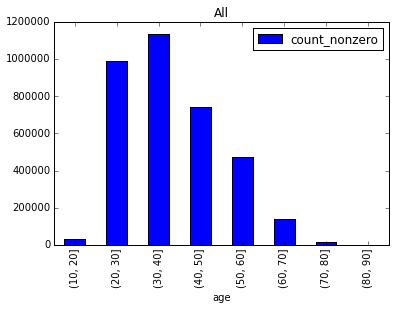

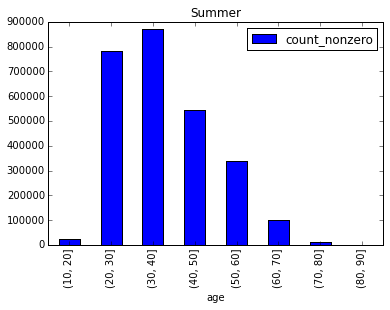

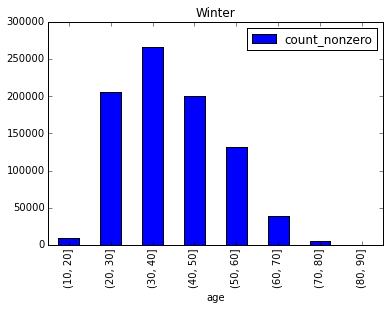

In [9]:
bins = np.arange(10, 99, 10)
# for all riders
df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All")
All_age_dist = df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero])

# for summer riders
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

# for winter riders
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])

# KT Test to compare with other distributions

In [14]:
#compare to normal

ksA=scipy.stats.kstest(All_age_dist, 'norm')
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "all, normal fit", ksA
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksA=scipy.stats.kstest(All_age_dist, 'cauchy')
ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "all, poisson fit", ksA
print "winter, poisson fit", ksW
print "summer, poisson fit", ksS

all, normal fit (1.0, 0.0)
winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
all, poisson fit (0.9999997198790086, 0.0)
winter, poisson fit (0.99999880158020016, 0.0)
summer, poisson fit (0.99999963442994877, 0.0)


# AD Test to compare with other distributions

In [17]:
adA=scipy.stats.kstest(All_age_dist, 'norm')
adW=scipy.stats.kstest(W_age_dist, 'norm')
adS=scipy.stats.kstest(S_age_dist, 'norm')
print 'all,normal fit', adA
print 'winter,normal fit', adW
print 'summer,normal fit',adS

all,normal fit (1.0, 0.0)
winter,normal fit (1.0, 0.0)
summer,normal fit (1.0, 0.0)


In [19]:
adW=scipy.stats.kstest(W_age_dist, 'cauchy')
adS=scipy.stats.kstest(S_age_dist, 'cauchy')
print 'winter,cauchy fit',adA
print 'winter,cauchy fit',adW
print 'winter,cauchy fit',adS

winter,cauchy fit (1.0, 0.0)
winter,cauchy fit (0.99999880158020016, 0.0)
winter,cauchy fit (0.99999963442994877, 0.0)


# Comment
All riders
Summer Riders 
Winter Riders 